In [1]:
import opendatasets as od


In [2]:
od.download('stackoverflow-developer-survey-2020')


94609408it [06:30, 242372.43it/s]                                                                                      


16384it [00:00, 39353.52it/s]                                                                                          


8192it [00:00, 11893.46it/s]                                                                                           


In [3]:
import os

In [4]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [5]:
import pandas as pd

In [6]:
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [8]:
survey_raw_df.shape

(64461, 61)

In [10]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [11]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [12]:
schema_raw


Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [13]:
schema_raw['YearsCodePro']


'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [14]:
project='python-eda-stackoverflow-survey'


In [15]:
!pip install jovian --upgrade --quiet


# Data preparation and Cleaning

In [16]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [17]:
len(selected_columns)


20

In [18]:
survey_df = survey_raw_df[selected_columns].copy()


In [19]:
schema = schema_raw[selected_columns]


In [20]:
survey_df.shape


(64461, 20)

In [23]:
survey_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [22]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [25]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

In [27]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [31]:
survey_df["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [32]:
import numpy as np

In [33]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [34]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
55715,Ireland,43.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,30.0,18.0,C#;Go;JavaScript;Swift;TypeScript,Go;JavaScript;Swift;TypeScript,Once a year,Meditate;Visit Stack Overflow;Go for a walk or...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
40267,"Venezuela, Bolivarian Republic of...",27.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,14.0,10.0,3.0,C#;Java;PHP;Python;SQL,Bash/Shell/PowerShell;C#;C++;Python,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Developer, back-end;Eng...",20.0,Very dissatisfied,Industry that I’d be working in;Diversity of t...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
63636,France,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,12.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, desktop or ente...",38.0,Slightly dissatisfied,NaN,Occasionally: 1-2 days per quarter but less th...,Very important
13311,United States,38.0,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,8.0,30.0,13.0,C;C++,C;C++,Once every few years,Call a coworker or friend;Watch help / tutoria...,Employed full-time,"Developer, desktop or enterprise applications",42.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Critically important
56098,Germany,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,22.0,10.0,HTML/CSS;Java;JavaScript;Python;TypeScript,JavaScript;Python;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...",Data scientist or machine learning specialist;...,40.0,Very satisfied,How widely used or impactful my work output wo...,Occasionally: 1-2 days per quarter but less th...,Fairly important
1956,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,14.0,6.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...,Bash/Shell/PowerShell;C#;Dart;Go;HTML/CSS;Java...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Neither satisfied nor dissatisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Critically important
12263,Canada,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,12.0,20.0,15.0,HTML/CSS;JavaScript;Python,JavaScript;Python;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very dissatisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Somewhat important
15897,Argentina,22.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,18.0,5.0,NaN,Bash/Shell/PowerShell;C++;Java;SQL,HTML/CSS;JavaScript;Kotlin;Python;TypeScript,Once a year,Play games;Visit Stack Overflow;Do other work ...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN
46059,India,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,16.0,12.0,C#;JavaScript;TypeScript,Go;JavaScript;Python;TypeScript,Every few months,V

# Exploratory Data Analysis

# Country

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'



In [51]:
survey_df.Country.nunique()

183

In [52]:
top_countries=survey_df.Country.value_counts().head(15)

In [53]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

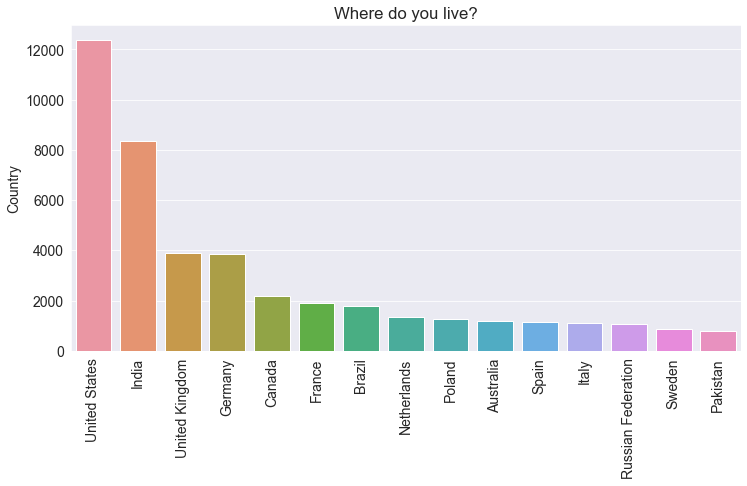

In [61]:
plt.figure(figsize=(12,6))
plt.title(schema.Country)
plt.xticks(rotation=90)
sns.barplot(x=top_countries.index,y=top_countries);

# Age

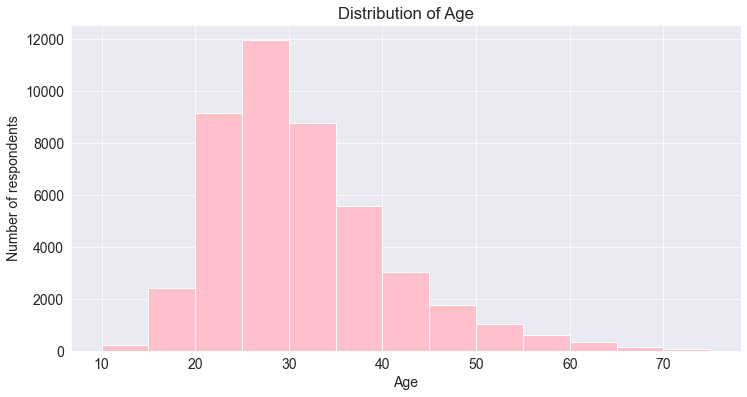

In [65]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of respondents")
plt.hist(survey_df.Age,bins=np.arange(10,80,5),color='pink');

# Gender

In [66]:
schema.Gender


'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [67]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

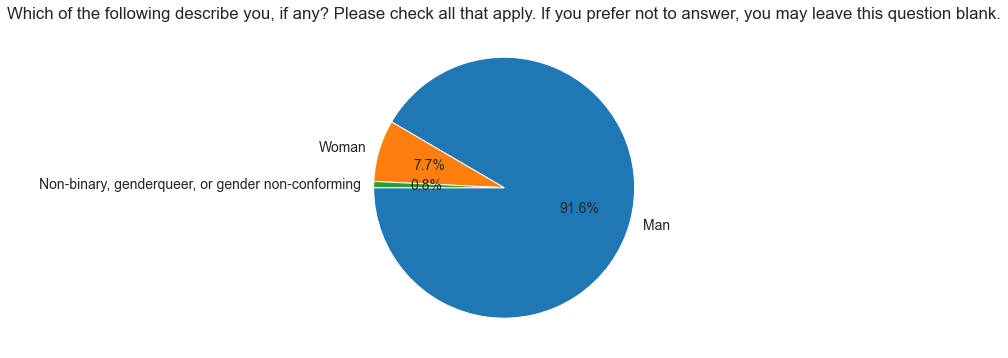

In [68]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);